In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [55]:
# loading the data
train_df=pd.read_csv("/kaggle/input/titanic/train.csv")
test_df=pd.read_csv("/kaggle/input/titanic/test.csv")

# knowing the data

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
# dropping duplicates if any
train_df.drop_duplicates(inplace=True)
test_df.drop_duplicates(inplace=True)

In [61]:
# train data null values 
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [56]:
# Age is required column for target 
train_df["Age"]=train_df["Age"].fillna(train_df["Age"].mean())

test_df["Age"]=test_df["Age"].fillna(test_df["Age"].mean())

In [62]:
# dropping columns 
train_df.drop("Cabin",axis=1,inplace=True)


In [58]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [57]:
test_df["Fare"]=test_df["Fare"].fillna(test_df["Fare"].mean())

In [59]:
test_df.drop("Cabin",inplace=True,axis=1)

In [60]:
test_df.shape

(418, 10)

In [53]:
# dropping null values 
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

In [11]:
# statistical value analysis
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,889.0,0.382452,0.486260,0.00,0.0000,0.000000,1.0,1.0000
Pclass,889.0,2.311586,0.834700,1.00,2.0000,3.000000,3.0,3.0000
Age,889.0,29.653446,12.968366,0.42,22.0000,29.699118,35.0,80.0000
SibSp,889.0,0.524184,1.103705,0.00,0.0000,0.000000,1.0,8.0000
Parch,889.0,0.382452,0.806761,0.00,0.0000,0.000000,0.0,6.0000
Fare,889.0,32.096681,49.697504,0.00,7.8958,14.454200,31.0,512.3292


In [12]:
train_df.describe(include="object") # for categorical values

,Sex,Embarked
count,889,889
unique,2,3
top,male,S
freq,577,644


# EDA

/tmp/ipykernel_33/879973352.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df["Age"])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'distiibution of age')

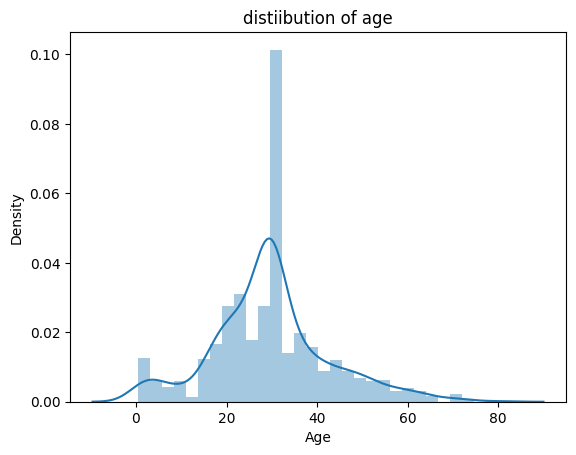

In [13]:
sns.distplot(train_df["Age"])
plt.title("distiibution of age")

Text(0.5, 1.0, 'boxplot for fare')

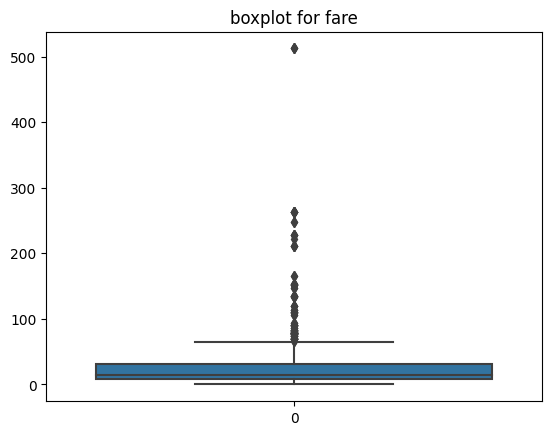

In [14]:
sns.boxplot(train_df["Fare"])
plt.title("boxplot for fare")

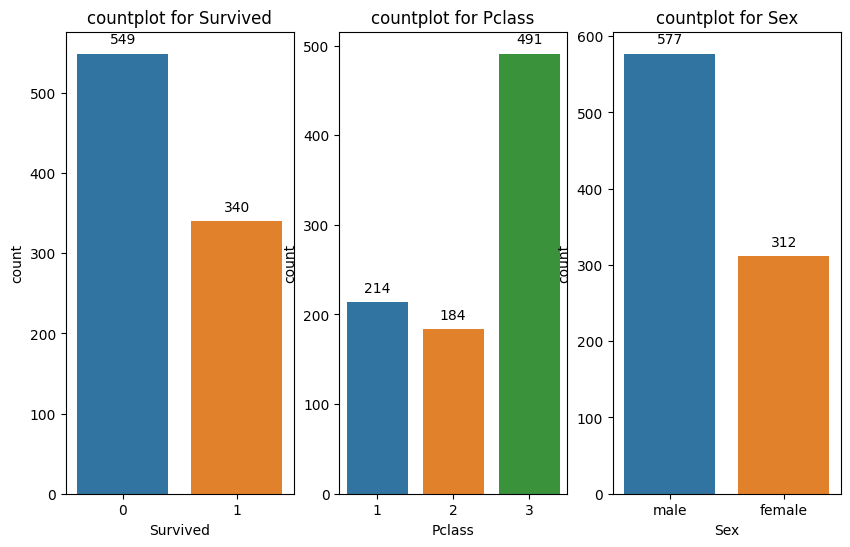

In [15]:
fig,ax=plt.subplots(ncols=3,nrows=1,figsize=(10,6))
ax=ax.flatten()
for i,col in enumerate(train_df.columns[:len(ax)]):
    
    dx=sns.countplot(x=col,data=train_df,ax=ax[i])
    ax[i].set_title(f'countplot for {col}')
    for p in dx.patches:
        dx.annotate(format(p.get_height(),".0f"),(p.get_x()+p.get_width()/2,p.get_height()),
                va="center",ha="center",xytext=(0,10),textcoords="offset points")
plt.show()        

<Axes: xlabel='Age', ylabel='Fare'>

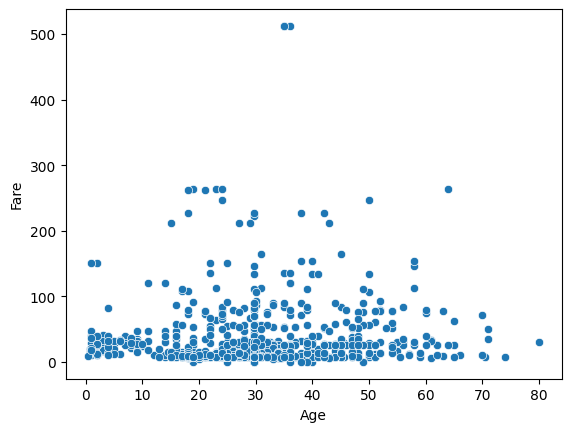

In [16]:
sns.scatterplot(data=train_df,y="Fare",x="Age")

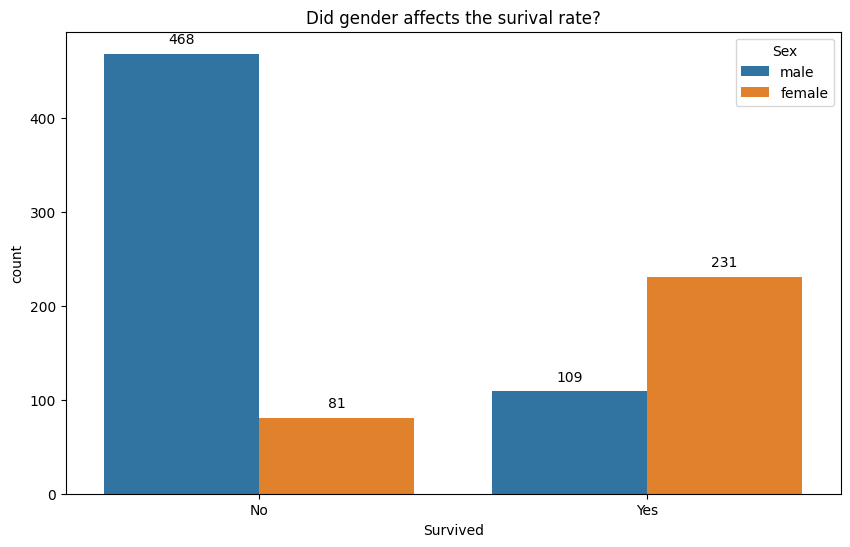

In [17]:
train_df.Survived=train_df.Survived.replace({0:"No",1:"Yes"})
plt.figure(figsize=(10,6))
sns.despine()
ax=sns.countplot(x="Survived",data=train_df,hue="Sex")
plt.title("Did gender affects the surival rate?")
for p in ax.patches:
        ax.annotate(format(p.get_height(),".0f"),(p.get_x()+p.get_width()/2,p.get_height()),
                va="center",ha="center",xytext=(0,10),textcoords="offset points")
plt.show()

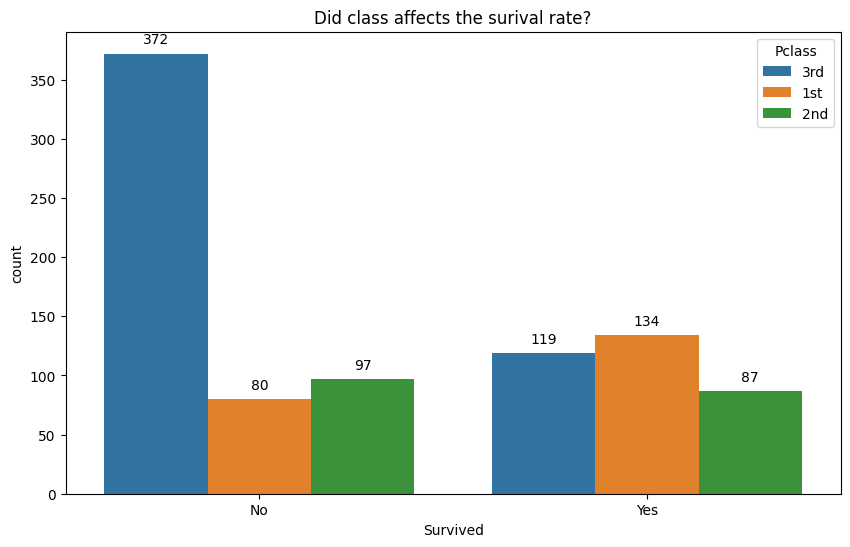

In [18]:
train_df.Pclass=train_df.Pclass.replace({1:"1st",2:"2nd",3:"3rd"})
plt.figure(figsize=(10,6))
sns.despine()
ax=sns.countplot(x="Survived",data=train_df,hue="Pclass")
plt.title("Did class affects the surival rate?")
for p in ax.patches:
        ax.annotate(format(p.get_height(),".0f"),(p.get_x()+p.get_width()/2,p.get_height()),
                va="center",ha="center",xytext=(0,10),textcoords="offset points")
plt.show()

Text(0.5, 1.0, 'Did age affects the surival?')

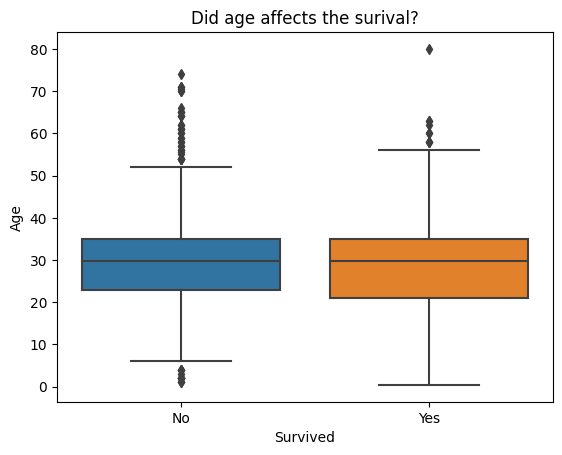

In [19]:
sns.boxplot(x="Survived",y="Age",data=train_df)
plt.title("Did age affects the surival?")

Text(0.5, 1.0, 'Did fare affects the surival?')

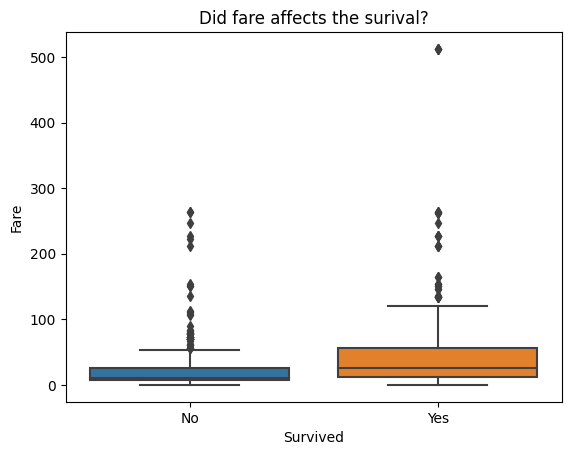

In [20]:
sns.despine()
sns.boxplot(x="Survived",y="Fare",data=train_df)
plt.title("Did fare affects the surival?")


Text(0.5, 1.0, 'which station people survived more')

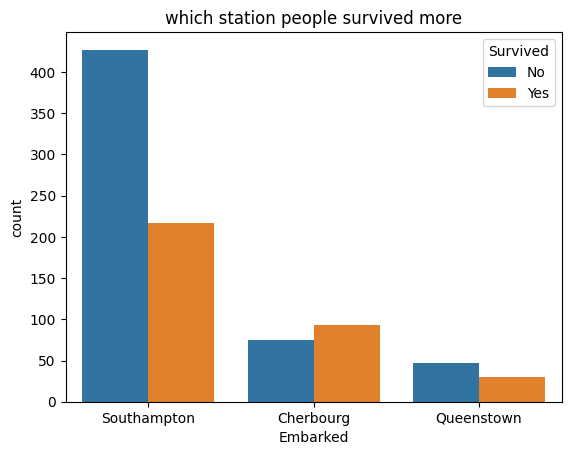

In [21]:
train_df.Embarked=train_df.Embarked.replace({"C":"Cherbourg", "Q":"Queenstown", "S":"Southampton"})
sns.countplot(hue="Survived",x="Embarked",data=train_df)
plt.title("which station people survived more")

In [82]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name             int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket           int64
Fare           float64
Embarked         int64
dtype: object

In [83]:
test_df.dtypes

PassengerId      int64
Pclass           int64
Name             int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket           int64
Fare           float64
Embarked         int64
dtype: object

In [78]:
cat_columns=["Sex","Name","Ticket","Embarked"]

In [67]:
cat_columns_test=["Sex","Name","Ticket","Embarked"]

In [24]:
num_columns=["Age","SibSp","Parch","Fare"]

# data preprocessing

In [79]:
# label Encoding
from sklearn.preprocessing import LabelEncoder

for col in cat_columns:
    
    train_df[col]=LabelEncoder().fit_transform(train_df[col])
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,0


In [73]:
# label Encoding
from sklearn.preprocessing import LabelEncoder

for col in cat_columns_test:
    
    test_df[col]=LabelEncoder().fit_transform(test_df[col])
test_df.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,206,1,34.5,0,0,152,7.8292,1
1,893,3,403,0,47.0,1,0,221,7.0000,2


In [76]:
test_df["Embarked"].unique()

array([1, 2, 0])

In [81]:
train_df["Embarked"].unique()

array([2, 0, 1, 3])

<Axes: >

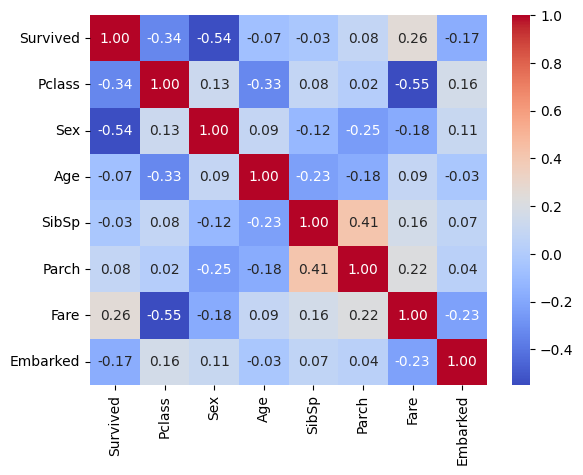

In [27]:
sns.heatmap(data=train_df.corr(),cmap="coolwarm",annot=True,fmt=".2f")

In [84]:
# splitting the data
x=train_df.drop("Survived",axis=1)
y=train_df["Survived"]

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

X=test_df

In [85]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X.shape)

(712, 10)
(179, 10)
(712,)
(179,)
(418, 10)


# LR

In [86]:
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression().fit(x_train,y_train)
y_pred=model.predict(x_test)


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [87]:
from sklearn.metrics import classification_report

LR=classification_report(y_test,y_pred)
print("Logistic Regression")
print(LR)

Logistic Regression
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        97
           1       0.81      0.70      0.75        82

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [88]:
Y=model.predict(X)
print("Survived",sum(Y==1))
print("Dead",sum(Y==0))

Survived 168
Dead 250


# DTC

In [89]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier().fit(x_train,y_train)
y_pred=model.predict(x_test)

DTC=classification_report(y_test,y_pred)

print("DecisionTreeClassifier")
print(DTC)
Y=model.predict(X)
print("Survived",sum(Y==1))
print("Dead",sum(Y==0))

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.73      0.86      0.79        97
           1       0.78      0.62      0.69        82

    accuracy                           0.75       179
   macro avg       0.76      0.74      0.74       179
weighted avg       0.75      0.75      0.74       179

Survived 190
Dead 228


# SVC

In [90]:
from sklearn.svm import SVC

model=SVC().fit(x_train,y_train)
y_pred=model.predict(x_test)

SVC=classification_report(y_test,y_pred)

print("SV Classifier")
print(SVC)


SV Classifier
              precision    recall  f1-score   support

           0       0.58      0.95      0.72        97
           1       0.76      0.20      0.31        82

    accuracy                           0.60       179
   macro avg       0.67      0.57      0.52       179
weighted avg       0.66      0.60      0.53       179



In [91]:
Y=model.predict(X)
print("Survived",sum(Y==1))
print("Dead",sum(Y==0))

Survived 60
Dead 358


# RFC

In [92]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier().fit(x_train,y_train)
y_pred=model.predict(x_test)

RFC=classification_report(y_test,y_pred)

print("RandomForestClassifier")
print(RFC)


RandomForestClassifier
              precision    recall  f1-score   support

           0       0.77      0.95      0.85        97
           1       0.92      0.66      0.77        82

    accuracy                           0.82       179
   macro avg       0.84      0.80      0.81       179
weighted avg       0.83      0.82      0.81       179



In [93]:
Y=model.predict(X)
print("Survived",sum(Y==1))
print("Dead",sum(Y==0))

Survived 145
Dead 273


In [94]:
Y

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# GBC

In [95]:
from sklearn.ensemble import GradientBoostingClassifier

model=GradientBoostingClassifier().fit(x_train,y_train)
y_pred=model.predict(x_test)

GBC=classification_report(y_test,y_pred)

print("GradientBoostingClassifier")
print(GBC)

GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.77      0.89      0.82        97
           1       0.84      0.68      0.75        82

    accuracy                           0.79       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.79      0.79       179



In [96]:
Y=model.predict(X)
print("Survived",sum(Y==1))
print("Dead",sum(Y==0))

Survived 141
Dead 277


# ABC

In [97]:
from sklearn.ensemble import AdaBoostClassifier

model=AdaBoostClassifier().fit(x_train,y_train)
y_pred=model.predict(x_test)

ABC=classification_report(y_test,y_pred)

print("AdaBoostClassifier")
print(ABC)

AdaBoostClassifier
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        97
           1       0.81      0.70      0.75        82

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [98]:
Y=model.predict(X)
print("Survived",sum(Y==1))
print("Dead",sum(Y==0))

Survived 147
Dead 271


In [99]:
Y

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# GBC With hyperparameter tuning

In [127]:
# hyperparameter tuning

from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.1, 0.01,0.001],
    'n_estimators': [100,200,500],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3]
}

grid_search=GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=param_grid)

grid_search.fit(x_train,y_train)
best_estimator=grid_search.best_estimator_

In [128]:
best_score_GB=grid_search.best_score_
y_pred=best_estimator.predict(x_test) # predicting the model
GBC=classification_report(y_pred,y_test)
print("GradientBoostingClassifier")
print(GBC)

GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.92      0.78      0.84       114
           1       0.70      0.88      0.78        65

    accuracy                           0.82       179
   macro avg       0.81      0.83      0.81       179
weighted avg       0.84      0.82      0.82       179



In [129]:
YGB=best_estimator.predict(X)
print("Survived",sum(Y==1))
print("Dead",sum(Y==0))

Survived 133
Dead 285


In [130]:
YGB

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [136]:
import os
os.makedirs("d", exist_ok=True)
final_df=pd.DataFrame(test_df["PassengerId"])
final_df["Survived"]=YGB
final_df.to_csv("d/prediction.csv",index=False)

In [110]:
final_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [117]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [4, 8, 12],         # Maximum depth of individual trees
    'min_samples_split': [2, 5, 10],  # Minimum samples for splitting a node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples allowed in a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features considered at each split
    'criterion': ['gini', 'entropy']  # Function used to measure split quality
}

In [119]:
clf = RandomForestClassifier()

search = GridSearchCV(clf, param_grid, cv=5)  # Adjust cv for desired number of folds

# Fit the search object to the data (X, y)
search.fit(x_train,y_train)

# Get the best model and best parameters
best_model = search.best_estimator_
best_params = search.best_params_

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

In [120]:
y_pred=best_estimator.predict(x_test) # predicting the model
RFC=classification_report(y_pred,y_test)
print("RandomforestClassifier")
print(RFC)

RandomforestClassifier
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       113
           1       0.71      0.88      0.78        66

    accuracy                           0.82       179
   macro avg       0.81      0.83      0.82       179
weighted avg       0.84      0.82      0.82       179



In [123]:
YRf=best_estimator.predict(X)
YRf

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [124]:
print("Survived",sum(Y==1))
print("Dead",sum(Y==0))

Survived 133
Dead 285


In [133]:
import os
os.makedirs("df2", exist_ok=True)
final_df=pd.DataFrame(test_df["PassengerId"])
final_df["Survived"]=YRf
final_df.to_csv("df2/predictions.csv",index=False)